In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from datetime import datetime

In [4]:
df = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/age_gender.csv')
df.shape

(23705, 5)

In [5]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df.gender.value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [7]:
genders = ['male','female']
df.gender = df.gender.apply(lambda x:genders[x])

In [8]:
df.gender.value_counts()

gender
male      12391
female    11314
Name: count, dtype: int64

In [9]:
df.pixels = df.pixels.apply(lambda x: np.array(x.split(),dtype='int32').reshape(48,48))
df.head()

,age,race,gender,img_name,pixels
0,1,2,male,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,2,male,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,2,male,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,2,male,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,2,male,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


In [10]:
type(df.pixels[0])

numpy.ndarray

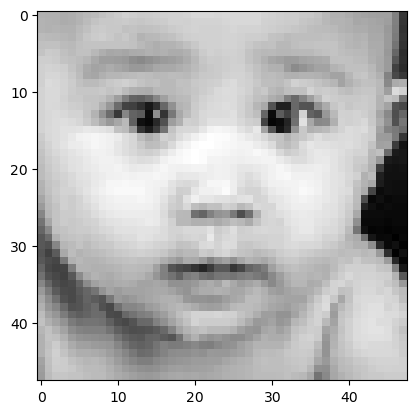

In [11]:
plt.imshow(df.pixels[0],cmap='gray')
plt.show()

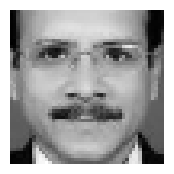

In [12]:
k = np.random.randint(23705)
plt.figure(figsize=[2,2])
plt.imshow(df.pixels[k],cmap='gray')
plt.axis(False)
plt.show()

In [13]:
X = np.zeros((23705,48,48))
X.shape

(23705, 48, 48)

In [14]:
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
for i in range(23705):
    X[i] = df.pixels[i]

In [16]:
X

array([[[129., 128., 128., ..., 118.,  99.,  53.],
        [130., 129., 128., ..., 117.,  98.,  52.],
        [131., 129., 130., ..., 114.,  97.,  50.],
        ...,
        [121., 138., 147., ..., 151., 150., 148.],
        [117., 137., 146., ..., 149., 148., 148.],
        [115., 135., 142., ..., 146., 146., 146.]],

       [[164.,  74., 111., ..., 111., 111., 104.],
        [179.,  70., 128., ..., 112., 113., 108.],
        [176.,  71., 146., ..., 112., 112., 109.],
        ...,
        [192., 196., 235., ..., 111., 124., 112.],
        [230., 226., 233., ..., 198., 197., 180.],
        [238., 239., 233., ..., 182., 170., 148.]],

       [[ 67.,  70.,  71., ..., 197., 194., 192.],
        [ 65.,  66.,  69., ..., 197., 194., 192.],
        [ 61.,  63.,  69., ..., 197., 194., 190.],
        ...,
        [159., 157., 159., ..., 114., 105., 105.],
        [102., 114., 110., ..., 114., 110., 107.],
        [ 98.,  97.,  95., ..., 112., 111., 108.]],

       ...,

       [[ 59.,  50.,  37

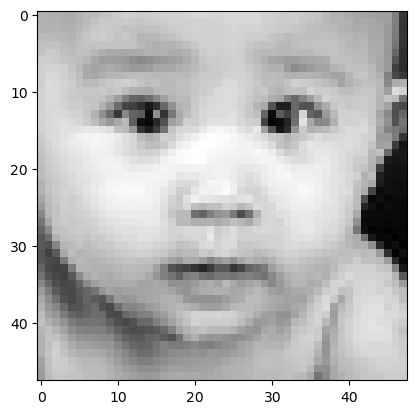

In [17]:
plt.imshow(X[0],cmap='gray')
plt.show()

In [ ]:
This image is not from img1, this is from the X

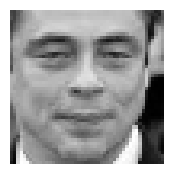

In [18]:
k = np.random.randint(23705)
plt.figure(figsize=[2,2])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.show()

In [19]:
X.shape

(23705, 48, 48)

# Displaying gender of the person that was given in dataset(Actual Gender)

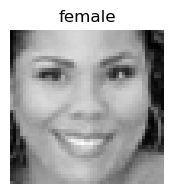

In [20]:
k = np.random.randint(23705)
plt.figure(figsize=[2,2])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(df.gender[k])
#plt.title(f'{df.gender[k]}',fontsize='small')
#ple.title(f'Gender:\n{df.gender[k]}',fontsize='small')
plt.show()

In [21]:
def plot_images(nrows,ncols):
    plt.figure(figsize=[10,6])
    for i in range(1,nrows*ncols+1):
        plt.subplot(nrows,ncols,i)
        k = np.random.randint(23705)
        plt.imshow(X[k],cmap='gray')
        plt.axis(False)
        plt.title(f'{df.gender[k]}',fontsize='small')
    plt.show()

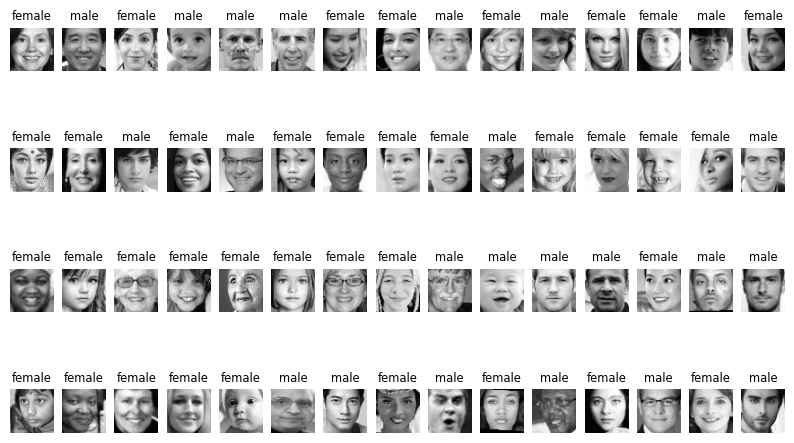

In [22]:
plot_images(4,15)

In [25]:
y = df.gender
y

0          male
1          male
2          male
3          male
4          male
          ...  
23700    female
23701    female
23702    female
23703    female
23704    female
Name: gender, Length: 23705, dtype: object

In [26]:
y = pd.get_dummies(y,dtype='int32')
y

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23700,1,0
23701,1,0
23702,1,0
23703,1,0


In [27]:
X.shape,y.shape

((23705, 48, 48), (23705, 2))

# Designing the Neural Network

In [47]:
#Adding layers

model = Sequential()

model.add(Input(shape=(48,48)))
model.add(Flatten())

#Hidden Layer 1

model.add(Dense(400,use_bias=True))
model.add(Activation('relu')) 

#Hidden Layer 2

model.add(Dense(200,use_bias=True))
model.add(Activation('relu'))

#Hidden Layer 3

model.add(Dense(200,use_bias=True))
model.add(Activation('relu'))

#Hidden Layer 4

model.add(Dense(200,use_bias=True))
model.add(Activation('relu'))
            
#Hidden Layer 5

model.add(Dense(100,use_bias=True))
model.add(Activation('relu'))
            
#output layer

model.add(Dense(2))
model.add(Activation('softmax')) 
                                 

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 400)            │       922,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,102,902 (4.21 MB)

 Trainable params: 1,102,902 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1000,random_state=10)
X_train.shape,X_test.shape

((22705, 48, 48), (1000, 48, 48))

In [53]:
start_time = datetime.now()
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.1)
end_time = datetime.now()
print('Total Execution Time:', end_time-start_time)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5923 - loss: 12.4104 - val_accuracy: 0.8151 - val_loss: 0.4283
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7683 - loss: 0.5074 - val_accuracy: 0.8375 - val_loss: 0.3913
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7893 - loss: 0.4729 - val_accuracy: 0.8239 - val_loss: 0.3848
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8136 - loss: 0.4105 - val_accuracy: 0.7635 - val_loss: 0.5185
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7994 - loss: 0.4371 - val_accuracy: 0.8041 - val_loss: 0.4435
Total Execution Time: 0:00:10.224582


In [54]:
model.evaluate(X_test,y_test) #evaluate gives loss and accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.4833 


[0.4787481427192688, 0.7960000038146973]

# Model Saving

In [735]:
model.save("/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/gender_prediction_model.keras")

# Predicting the gender of persons in test images

In [55]:
y_predict = model.predict(X_test)
y_predict

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2.7588265e-02, 9.7241181e-01],
       [9.4409156e-01, 5.5908348e-02],
       [9.9766940e-01, 2.3305279e-03],
       ...,
       [9.9999332e-01, 6.6209991e-06],
       [1.8838705e-07, 9.9999976e-01],
       [1.6110308e-02, 9.8388964e-01]], dtype=float32)

In [56]:
y_predict = np.array([np.argmax(i) for i in y_predict]) #argmax will tell which argument is having maximum values
y_predict #0 is female
          #1 is male

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [57]:
y_test #Now I cannot compare this data with above y_predict

,female,male
18398,0,1
4182,0,1
1779,1,0
1882,0,1
13193,1,0
...,...,...
20736,0,1
9909,0,1
6489,1,0
21363,0,1


In [58]:
y_true = np.array([np.argmax(i) for i in y_test.values]) #argmax will tell which argument is having maximum values
y_true

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [59]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [60]:
accuracy_score(y_true,y_predict)

0.796

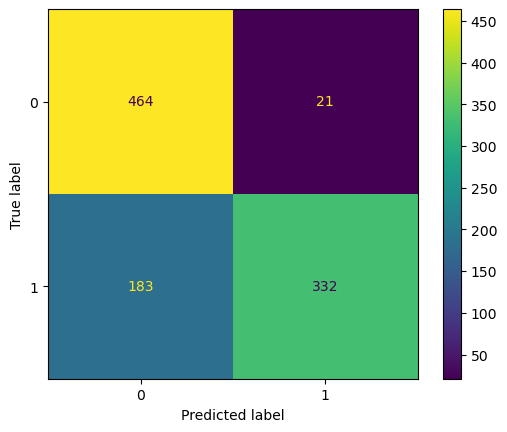

In [61]:
ConfusionMatrixDisplay.from_predictions(y_true,y_predict)
plt.show()

In [ ]:
0 is female


# Evaluating a few samples 

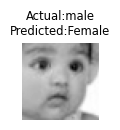

In [63]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

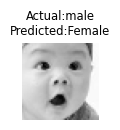

In [67]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

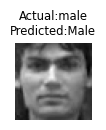

In [1077]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

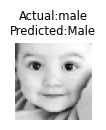

In [1166]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

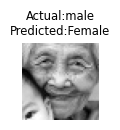

In [1437]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show()

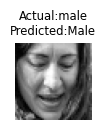

(None, 163)

In [1755]:
k = np.random.randint(1000)
genders=['Female','Male']
plt.figure(figsize=[1,1])
plt.imshow(X[k],cmap='gray')
plt.axis(False)
plt.title(f'Actual:{df.gender[y_true[k]]}\nPredicted:{genders[y_predict[k]]}',fontsize='small')
plt.show(),k

# Observation

Model is correctly predicting the gender of the person in the image for youth due to clearly differentiable features in face

Predition for small kids and old persons in some cases is going wrong